# 따릉이 외국인 관광객 이용 분석

## 분석 목표
1. 연간 외국인 따릉이 이용량 증가량 (2021-2024)
2. 월별 외국인 따릉이 이용량 (2022-2024)
3. 요일별 외국인 따릉이 이용량 (2022-2024)

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.font_manager as fm
from matplotlib import rcParams
import warnings
import os

# 한글 폰트 경고 무시
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

# Windows 시스템 폰트를 직접 로드하는 함수
def setup_korean_font():
    """Windows 시스템의 한글 폰트를 직접 로드하고 설정"""
    
    # 폰트 파일 경로들 (우선순위 순)
    font_paths = [
        r'C:\Windows\Fonts\malgun.ttf',      # 맑은 고딕
        r'C:\Windows\Fonts\malgunbd.ttf',    # 맑은 고딕 Bold
        r'C:\Windows\Fonts\gulim.ttc',       # 굴림
        r'C:\Windows\Fonts\batang.ttc'       # 바탕
    ]
    
    korean_font = None
    
    for font_path in font_paths:
        if os.path.exists(font_path):
            try:
                # 폰트를 직접 로드
                korean_font = fm.FontProperties(fname=font_path)
                
                # matplotlib 폰트 매니저에 폰트 추가
                fm.fontManager.addfont(font_path)
                
                print(f"✅ 폰트 로드 성공: {font_path}")
                print(f"   폰트명: {korean_font.get_name()}")
                
                # matplotlib 전역 설정에 폰트 적용
                plt.rcParams['font.family'] = korean_font.get_name()
                rcParams['font.family'] = korean_font.get_name()
                plt.rcParams['axes.unicode_minus'] = False
                
                return korean_font
                
            except Exception as e:
                print(f"❌ {font_path} 로드 실패: {e}")
                continue
    
    print("❌ 모든 한글 폰트 로드 실패")
    return None

# 한글 폰트 설정 실행
korean_font_prop = setup_korean_font()

# seaborn 스타일 설정
sns.set_style("whitegrid")

print(f"최종 설정된 폰트: {plt.rcParams['font.family']}")
print("라이브러리 로드 완료")

# 폰트 캐시 클리어하고 재생성
try:
    fm.fontManager.__init__()
    print("폰트 캐시 재생성 완료")
except:
    pass


✅ 폰트 로드 성공: C:\Windows\Fonts\malgun.ttf
   폰트명: Malgun Gothic
최종 설정된 폰트: ['sans-serif']
라이브러리 로드 완료
폰트 캐시 재생성 완료


## 1. 연간 외국인 따릉이 이용량 증가량 분석 (2021-2024)

In [98]:
monthly_files = {
    2021: '../Monthly_21년_외국인대여정보.csv',
    2022: '../Monthly_22년_외국인대여정보.csv', 
    2023: '../Monthly_23년_외국인대여정보.csv',
    2024: '../Monthly_24년_외국인대여정보.csv'
}

annual_data = {}
for year, file_path in monthly_files.items():
    try:
        df = pd.read_csv(file_path, encoding='utf-8')
        print(f"{year}년 데이터 로드 완료: {len(df)} rows")
        print(f"컬럼: {list(df.columns)}")
        
        if '대여건수' in df.columns:
            total_rentals = df['대여건수'].sum()
        elif '대여수' in df.columns:
            total_rentals = df['대여수'].sum()
        else:
            print(f"{year}년 대여 관련 컬럼을 찾을 수 없습니다")
            total_rentals = 0
            
        annual_data[year] = total_rentals
        print(f"{year}년 총 대여건수: {total_rentals:,}")
        
    except Exception as e:
        print(f"{year}년 데이터 로드 실패: {e}")
        annual_data[year] = 0

print("\n=== 연도별 총 대여건수 ===")
for year, count in annual_data.items():
    print(f"{year}: {count:,}건")


2021년 데이터 로드 완료: 7655 rows
컬럼: ['일시', '대여소', '대여건수', '반납건수']
2021년 총 대여건수: 19,049
2022년 데이터 로드 완료: 11743 rows
컬럼: ['일시', '대여소', '대여건수', '반납건수']
2022년 총 대여건수: 50,761
2023년 데이터 로드 완료: 11969 rows
컬럼: ['일시', '대여소', '대여건수', '반납건수']
2023년 총 대여건수: 64,342
2024년 데이터 로드 완료: 14055 rows
컬럼: ['년월', '대여소명', '대여건수', '반납건수']
2024년 총 대여건수: 71,077

=== 연도별 총 대여건수 ===
2021: 19,049건
2022: 50,761건
2023: 64,342건
2024: 71,077건


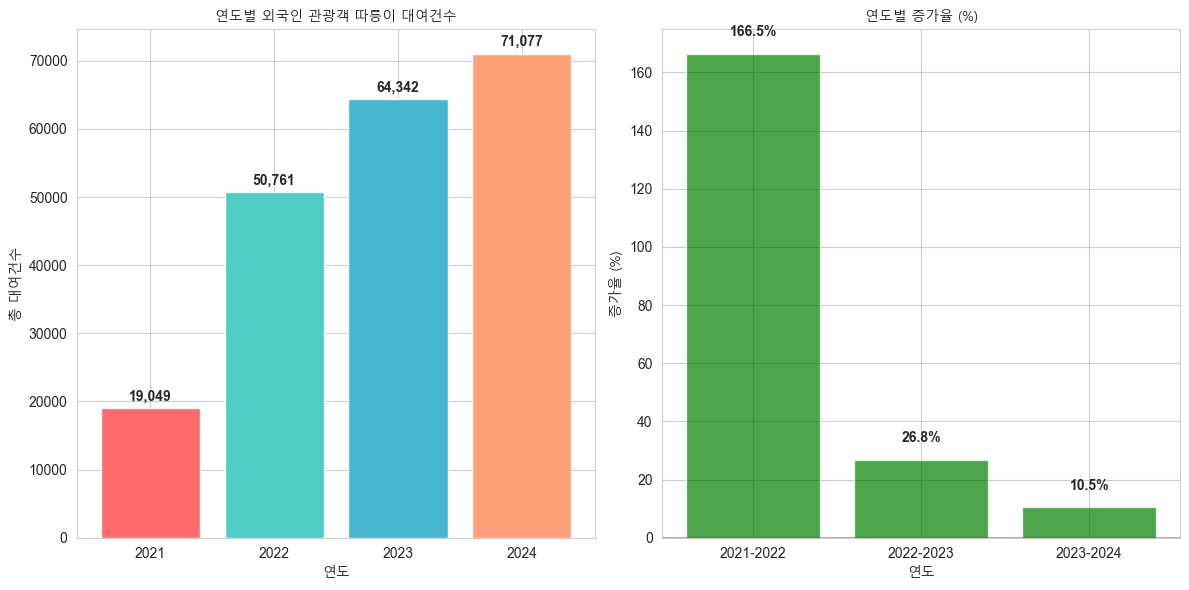

In [99]:
years = list(annual_data.keys())
counts = list(annual_data.values())

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
bars = plt.bar(years, counts, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
plt.title('연도별 외국인 관광객 따릉이 대여건수', fontsize=14, fontweight='bold', fontproperties=korean_font_prop)
plt.xlabel('연도', fontproperties=korean_font_prop)
plt.ylabel('총 대여건수', fontproperties=korean_font_prop)
plt.xticks(years)

for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(counts)*0.01 if max(counts) > 0 else 1000, 
             f'{count:,}', ha='center', va='bottom', fontweight='bold')

plt.subplot(1, 2, 2)
growth_rates = []
growth_years = []
for i in range(1, len(years)):
    if counts[i-1] > 0:
        growth_rate = ((counts[i] - counts[i-1]) / counts[i-1]) * 100
        growth_rates.append(growth_rate)
        growth_years.append(f"{years[i-1]}-{years[i]}")

if growth_rates:
    colors = ['green' if rate >= 0 else 'red' for rate in growth_rates]
    bars = plt.bar(growth_years, growth_rates, color=colors, alpha=0.7)
    plt.title('연도별 증가율 (%)', fontsize=14, fontweight='bold', fontproperties=korean_font_prop)
    plt.xlabel('연도', fontproperties=korean_font_prop)
    plt.ylabel('증가율 (%)', fontproperties=korean_font_prop)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

    for bar, rate in zip(bars, growth_rates):
        plt.text(bar.get_x() + bar.get_width()/2, 
                 bar.get_height() + (5 if rate >= 0 else -10), 
                 f'{rate:.1f}%', ha='center', va='bottom' if rate >= 0 else 'top', 
                 fontweight='bold')

plt.tight_layout()
plt.show()


## 2. 월별 외국인 따릉이 이용량 분석 (2022-2024)

In [100]:
monthly_analysis_files = {
    2022: '../Monthly_22년_외국인대여정보.csv',
    2023: '../Monthly_23년_외국인대여정보.csv',
    2024: '../Monthly_24년_외국인대여정보.csv'
}

monthly_usage = {}

for year, file_path in monthly_analysis_files.items():
    try:
        # UTF-8 with BOM을 처리하기 위해 encoding='utf-8-sig' 사용
        df = pd.read_csv(file_path, encoding='utf-8-sig')
        print(f"\n{year}년 데이터 로드: {len(df)} rows")
        print(f"컬럼: {list(df.columns)}")
        print(f"샘플 데이터:")
        print(df.head(3))
        
        # 첫 번째 컬럼이 년월 데이터 (헤더명은 다르지만 모두 YYYYMM 형식)
        date_col = df.columns[0]  # 첫 번째 컬럼 (일시 또는 년월)
        
        # 년월에서 월 추출 (202201 -> 1)
        df['년월_str'] = df[date_col].astype(str)
        df['월'] = df['년월_str'].str[-2:].astype(int)  # 마지막 2자리가 월
        
        print(f"추출된 월별 고유값: {sorted(df['월'].unique())}")
        
        # 월별 대여건수 합계
        monthly_stats = df.groupby('월')['대여건수'].sum()
        monthly_usage[year] = monthly_stats
        print(f"{year}년 월별 데이터 처리 완료")
        print(f"월별 합계:\n{monthly_stats}")
        print("-" * 50)
            
    except Exception as e:
        print(f"{year}년 데이터 처리 실패: {e}")

monthly_df = pd.DataFrame(monthly_usage)
monthly_df = monthly_df.fillna(0)
print("\n=== 최종 월별 이용량 데이터 ===")
print(monthly_df)
print(f"\n각 연도별 총합:")
for year in monthly_df.columns:
    total = monthly_df[year].sum()
    print(f"{year}년: {total:,}건")



2022년 데이터 로드: 11743 rows
컬럼: ['일시', '대여소', '대여건수', '반납건수']
샘플 데이터:
       일시                        대여소  대여건수  반납건수
0  202201       1004. 삼성광나루아파트 버스정류장     0     1
1  202201  1016. 해뜨는 주유소옆 리엔파크 109동앞     0     1
2  202201              1024.  강동구청 앞     1     1
추출된 월별 고유값: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12)]
2022년 월별 데이터 처리 완료
월별 합계:
월
1      518
2      566
3     1570
4     4838
5     6350
6     5735
7     5640
8     4198
9     7278
10    7154
11    5981
12     933
Name: 대여건수, dtype: int64
--------------------------------------------------

2023년 데이터 로드: 11969 rows
컬럼: ['일시', '대여소', '대여건수', '반납건수']
샘플 데이터:
       일시              대여소  대여건수  반납건수
0  202301     1003. 해공도서관앞     1     0
1  202301  104. 합정역 1번출구 앞     1     0
2  202301  106. 합정역 7번출구 앞     4    11
추출된 월별 고유값: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), 

korean_font_prop 상태: Malgun Gothic:style=normal:variant=normal:weight=normal:stretch=normal:file=C\:\\Windows\\Fonts\\malgun.ttf:size=10.0


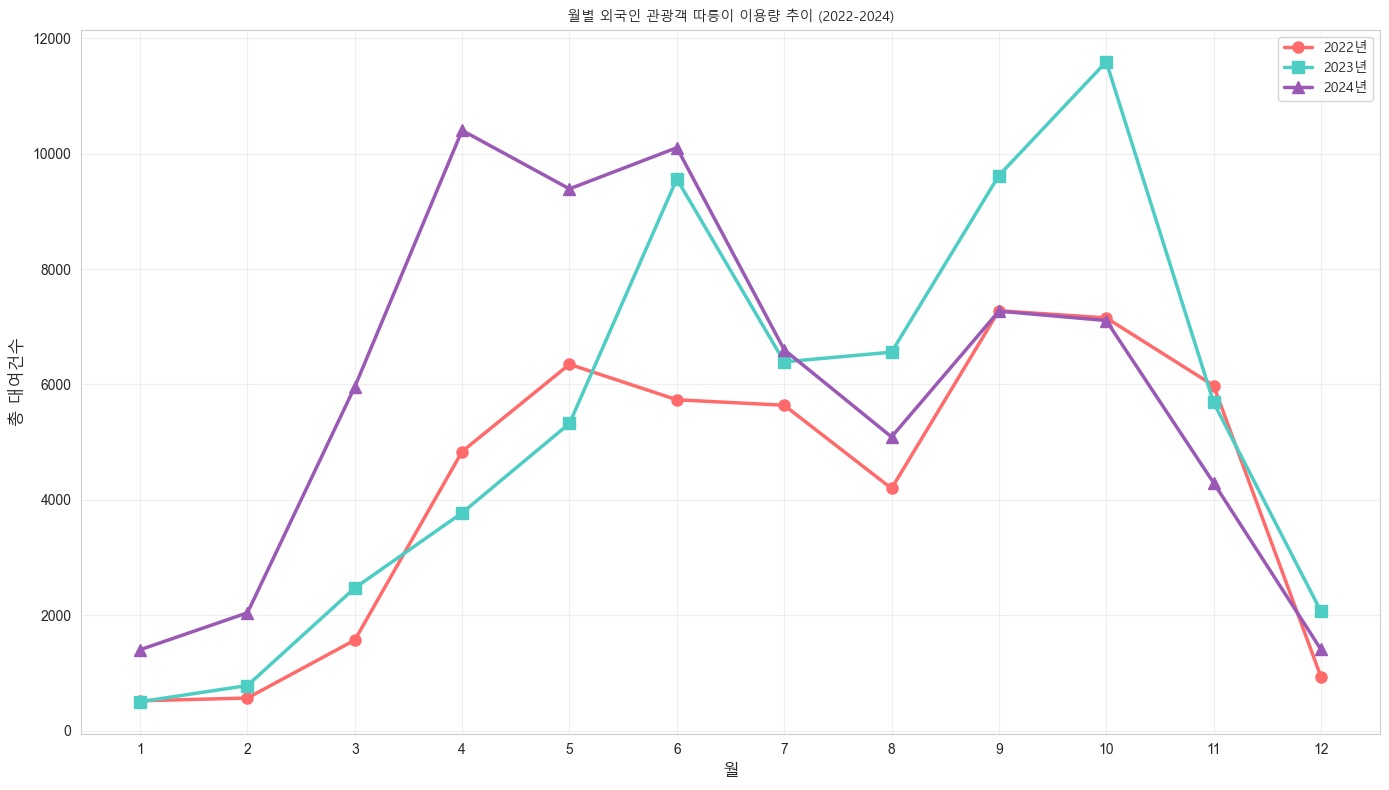

C:\Users\SBA\AppData\Local\Temp\ipykernel_17740\4095359389.py:50: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SBA\AppData\Local\Temp\ipykernel_17740\4095359389.py:50: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\SBA\Desktop\데이터분석\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\SBA\Desktop\데이터분석\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


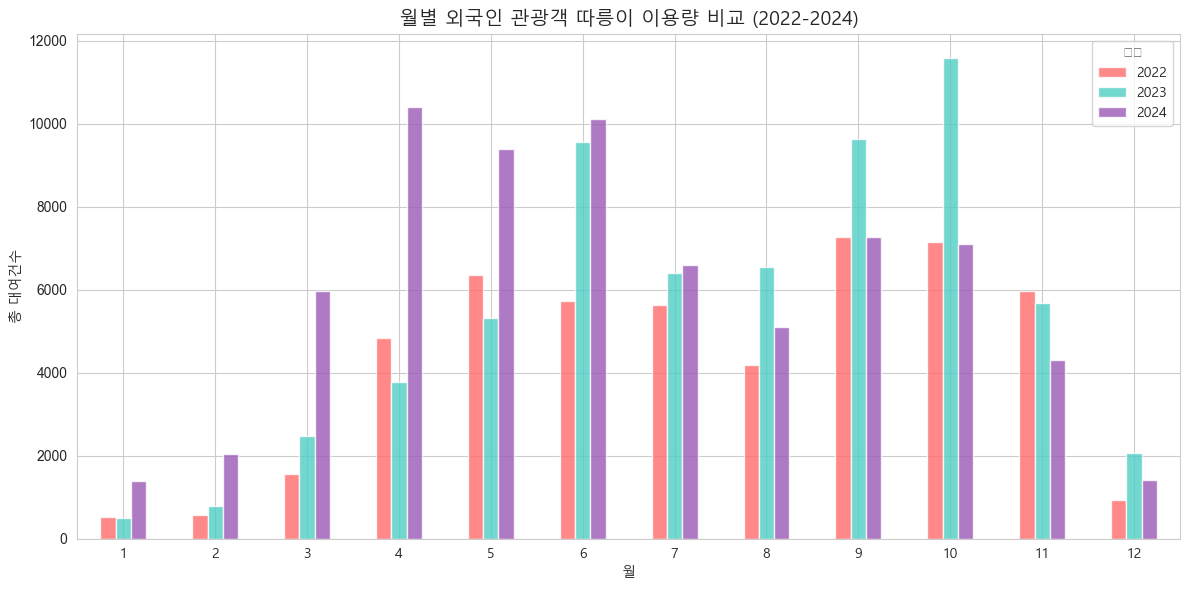

In [101]:
# korean_font_prop 변수가 정의되어 있는지 확인
try:
    print(f"korean_font_prop 상태: {korean_font_prop}")
except NameError:
    print("❌ korean_font_prop가 정의되지 않았습니다. 첫 번째 셀을 먼저 실행하세요!")
    # 임시 폰트 설정
    import matplotlib.font_manager as fm
    korean_font_prop = fm.FontProperties(fname=r'C:\Windows\Fonts\malgun.ttf')
    print("✅ 임시 폰트 설정 완료")

plt.figure(figsize=(14, 8))

months = range(1, 13)
# 더 구분하기 쉬운 색상으로 변경
colors = ['#FF6B6B', '#4ECDC4', '#9B59B6']  # 빨강, 청록, 보라
markers = ['o', 's', '^']

for i, year in enumerate([2022, 2023, 2024]):
    if year in monthly_df.columns:
        values = [monthly_df.loc[month, year] if month in monthly_df.index else 0 for month in months]
        plt.plot(months, values, marker=markers[i], linewidth=2.5, 
                markersize=8, color=colors[i], label=f'{year}년')

plt.title('월별 외국인 관광객 따릉이 이용량 추이 (2022-2024)', fontsize=16, fontweight='bold', fontproperties=korean_font_prop)
plt.xlabel('월', fontsize=12, fontproperties=korean_font_prop)
plt.ylabel('총 대여건수', fontsize=12, fontproperties=korean_font_prop)
plt.xticks(months)
plt.legend(fontsize=12, prop=korean_font_prop)  # 범례에도 폰트 적용
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 막대 그래프
if not monthly_df.empty:
    plt.figure(figsize=(12, 6))
    ax = monthly_df.plot(kind='bar', color=colors, alpha=0.8, ax=plt.gca())
    
    # 모든 텍스트 요소에 한글 폰트 적용
    ax.set_title('월별 외국인 관광객 따릉이 이용량 비교 (2022-2024)', fontproperties=korean_font_prop, fontsize=14, fontweight='bold')
    ax.set_xlabel('월', fontproperties=korean_font_prop)
    ax.set_ylabel('총 대여건수', fontproperties=korean_font_prop)
    ax.legend(title='연도', prop=korean_font_prop)
    
    # x축 틱 라벨에도 폰트 적용
    for label in ax.get_xticklabels():
        label.set_fontproperties(korean_font_prop)
    
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("월별 데이터가 없습니다.")


## 3. 요일별 외국인 따릉이 이용량 분석 (2022-2024)

In [102]:
daily_files = {
    2022: '../Daily_22년_외국인이용정보.csv',
    2023: '../Daily_23년_외국인이용정보.csv',
    2024: '../Daily_24년_외국인이용정보.csv'
}

weekday_usage = {}
weekday_names = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

for year, file_path in daily_files.items():
    try:
        df = pd.read_csv(file_path, encoding='utf-8')
        print(f"{year}년 일별 데이터 로드: {len(df)} rows")
        print(f"컬럼: {list(df.columns)}")
        
        if '일시' in df.columns or '날짜' in df.columns:
            date_col = '일시' if '일시' in df.columns else '날짜'
            rental_col = '대여건수' if '대여건수' in df.columns else '대여수'
            
            df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
            df = df.dropna(subset=[date_col])
            
            df['요일'] = df[date_col].dt.dayofweek
            df['요일명'] = df['요일'].map({0: '월요일', 1: '화요일', 2: '수요일', 3: '목요일', 
                                         4: '금요일', 5: '토요일', 6: '일요일'})
            
            weekday_stats = df.groupby('요일명')[rental_col].sum()
            weekday_usage[year] = weekday_stats
            print(f"{year}년 요일별 데이터 처리 완료")
            
        else:
            print(f"{year}년 데이터에 날짜 컬럼을 찾을 수 없습니다")
            
    except Exception as e:
        print(f"{year}년 일별 데이터 처리 실패: {e}")

weekday_df = pd.DataFrame(weekday_usage)
weekday_df = weekday_df.reindex(weekday_names)
weekday_df = weekday_df.fillna(0)
print("\n=== 요일별 이용량 데이터 ===\n", weekday_df)


2022년 일별 데이터 로드: 46503 rows
컬럼: ['일시', '대여소', '대여건수', '반납건수']
2022년 요일별 데이터 처리 완료
2023년 일별 데이터 로드: 51908 rows
컬럼: ['일시', '대여소', '대여건수', '반납건수']
2023년 요일별 데이터 처리 완료
2024년 일별 데이터 로드: 60341 rows
컬럼: ['일시', '대여소명', '대여건수', '반납건수']
2024년 요일별 데이터 처리 완료

=== 요일별 이용량 데이터 ===
      2022   2023   2024
요일명                    
월요일  6156   9297   9654
화요일  6343   8039   8637
수요일  6207   7600   8930
목요일  5973   7621   9208
금요일  7252   9208   9995
토요일  9502  10686  11758
일요일  9328  11891  12895


강제 설정된 폰트: ['Malgun Gothic']


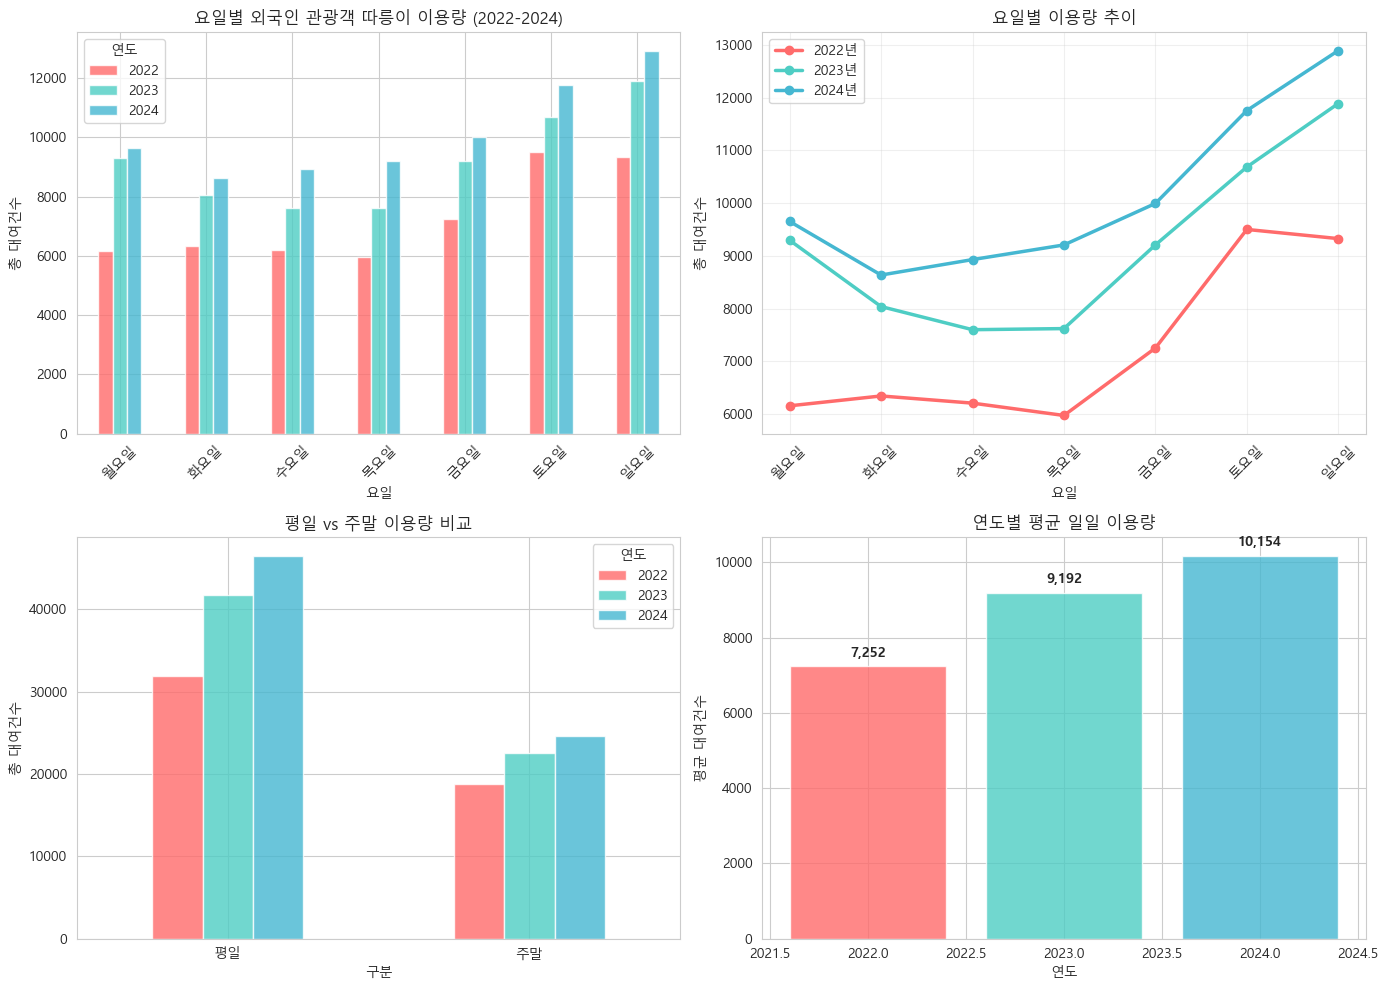

In [103]:
# 폰트 강제 재설정 (더 강력한 방법)
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

# 직접 폰트 파일 로드
font_path = r'C:\Windows\Fonts\malgun.ttf'
korean_font_prop = fm.FontProperties(fname=font_path)

# matplotlib 전역 설정 강제 적용
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.sans-serif'] = ['Malgun Gothic', 'Arial']
plt.rcParams['axes.unicode_minus'] = False

print(f"강제 설정된 폰트: {plt.rcParams['font.family']}")

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
if not weekday_df.empty:
    ax1 = weekday_df.plot(kind='bar', color=colors, alpha=0.8, ax=plt.gca())
    ax1.set_title('요일별 외국인 관광객 따릉이 이용량 (2022-2024)', fontproperties=korean_font_prop, fontsize=12, fontweight='bold')
    ax1.set_xlabel('요일', fontproperties=korean_font_prop)
    ax1.set_ylabel('총 대여건수', fontproperties=korean_font_prop)
    
    # x축 틱 라벨에도 한글 폰트 적용
    for label in ax1.get_xticklabels():
        label.set_fontproperties(korean_font_prop)
    
    plt.xticks(rotation=45)
    ax1.legend(title='연도', prop=korean_font_prop)

plt.subplot(2, 2, 2)
if not weekday_df.empty:
    weekdays = weekday_df.index
    for i, year in enumerate([2022, 2023, 2024]):
        if year in weekday_df.columns:
            values = weekday_df[year].values
            plt.plot(weekdays, values, marker='o', linewidth=2.5, 
                    markersize=6, color=colors[i], label=f'{year}년')

    plt.title('요일별 이용량 추이', fontproperties=korean_font_prop, fontsize=12, fontweight='bold')
    plt.xlabel('요일', fontproperties=korean_font_prop)
    plt.ylabel('총 대여건수', fontproperties=korean_font_prop)
    
    # x축 틱 라벨에도 한글 폰트 적용
    ax2 = plt.gca()
    for label in ax2.get_xticklabels():
        label.set_fontproperties(korean_font_prop)
    
    plt.xticks(rotation=45)
    plt.legend(prop=korean_font_prop)
    plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
if not weekday_df.empty:
    weekend_vs_weekday = pd.DataFrame()
    for year in [2022, 2023, 2024]:
        if year in weekday_df.columns:
            weekday_sum = weekday_df.loc[['월요일', '화요일', '수요일', '목요일', '금요일'], year].sum()
            weekend_sum = weekday_df.loc[['토요일', '일요일'], year].sum()
            weekend_vs_weekday[year] = [weekday_sum, weekend_sum]

    if not weekend_vs_weekday.empty:
        weekend_vs_weekday.index = ['평일', '주말']
        ax3 = weekend_vs_weekday.plot(kind='bar', color=colors, alpha=0.8, ax=plt.gca())
        ax3.set_title('평일 vs 주말 이용량 비교', fontproperties=korean_font_prop, fontsize=12, fontweight='bold')
        ax3.set_xlabel('구분', fontproperties=korean_font_prop)
        ax3.set_ylabel('총 대여건수', fontproperties=korean_font_prop)
        
        # x축 틱 라벨에도 한글 폰트 적용
        for label in ax3.get_xticklabels():
            label.set_fontproperties(korean_font_prop)
            
        plt.xticks(rotation=0)
        ax3.legend(title='연도', prop=korean_font_prop)

plt.subplot(2, 2, 4)
if not weekday_df.empty:
    avg_by_year = weekday_df.mean(axis=0)
    if len(avg_by_year) > 0:
        bars = plt.bar(avg_by_year.index, avg_by_year.values, color=colors[:len(avg_by_year)], alpha=0.8)
        plt.title('연도별 평균 일일 이용량', fontproperties=korean_font_prop, fontsize=12, fontweight='bold')
        plt.xlabel('연도', fontproperties=korean_font_prop)
        plt.ylabel('평균 대여건수', fontproperties=korean_font_prop)

        for bar, value in zip(bars, avg_by_year.values):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + value*0.02, 
                     f'{value:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


## 종합 분석 결과

In [104]:
print("=== 따릉이 외국인 관광객 이용 분석 결과 ===")
print()

print("1. 연간 이용량 증가 분석:")
for i, (year, count) in enumerate(annual_data.items()):
    if i > 0:
        prev_year = list(annual_data.keys())[i-1]
        prev_count = annual_data[prev_year]
        if prev_count > 0:
            growth = ((count - prev_count) / prev_count) * 100
            print(f"   {year}년: {count:,}건 (전년 대비 {growth:+.1f}%)")
        else:
            print(f"   {year}년: {count:,}건")
    else:
        print(f"   {year}년: {count:,}건 (기준년)")

print("\n2. 월별 이용 패턴:")
if not monthly_df.empty:
    for year in [2022, 2023, 2024]:
        if year in monthly_df.columns:
            peak_month = monthly_df[year].idxmax()
            peak_value = monthly_df[year].max()
            print(f"   {year}년 최고: {peak_month}월 ({peak_value:,}건)")

print("\n3. 요일별 이용 패턴:")
if not weekday_df.empty:
    for year in [2022, 2023, 2024]:
        if year in weekday_df.columns:
            peak_weekday = weekday_df[year].idxmax()
            peak_value = weekday_df[year].max()
            weekday_avg = weekday_df.loc[['월요일', '화요일', '수요일', '목요일', '금요일'], year].mean()
            weekend_avg = weekday_df.loc[['토요일', '일요일'], year].mean()
            print(f"   {year}년 최고: {peak_weekday} ({peak_value:,}건)")
            print(f"   {year}년 평일 평균: {weekday_avg:,.0f}건, 주말 평균: {weekend_avg:,.0f}건")


=== 따릉이 외국인 관광객 이용 분석 결과 ===

1. 연간 이용량 증가 분석:
   2021년: 19,049건 (기준년)
   2022년: 50,761건 (전년 대비 +166.5%)
   2023년: 64,342건 (전년 대비 +26.8%)
   2024년: 71,077건 (전년 대비 +10.5%)

2. 월별 이용 패턴:
   2022년 최고: 9월 (7,278건)
   2023년 최고: 10월 (11,592건)
   2024년 최고: 4월 (10,403건)

3. 요일별 이용 패턴:
   2022년 최고: 토요일 (9,502건)
   2022년 평일 평균: 6,386건, 주말 평균: 9,415건
   2023년 최고: 일요일 (11,891건)
   2023년 평일 평균: 8,353건, 주말 평균: 11,288건
   2024년 최고: 일요일 (12,895건)
   2024년 평일 평균: 9,285건, 주말 평균: 12,326건
